In [69]:
import pickle
import matplotlib.pyplot as plt
import os
from keras import models
from skimage.io import imread
from kb.generator.extract_class import extract_class
import numpy as np

## Training history
### Prepare history files

In [60]:
histories_path = [
    './models/classification_oben_history.hdf5',
    './models/classification_seite_history.hdf5',
    './models/classification_unter_history.hdf5'
]

histories = list(map(lambda path: pickle.load(open(path, "rb")), histories_path))

In [61]:
def graph_accuracy(history, name=""):
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('Model accuracy of "' + name + '"')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

### Show learning curve

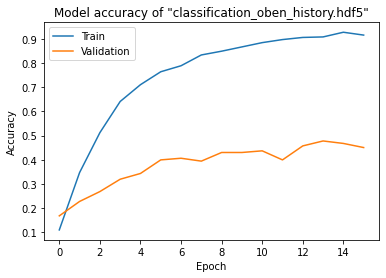

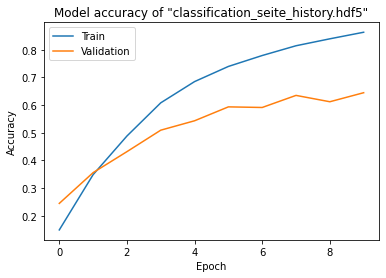

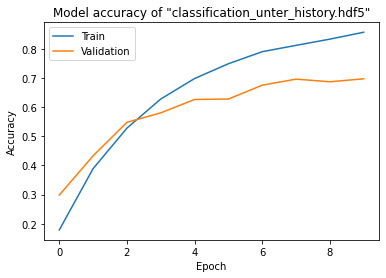

In [62]:
for history, path in zip(histories, histories_path):
    graph_accuracy(history, os.path.basename(path))

## Demo

### Prepare model and labels.

In [67]:
oben_model = models.load_model("models/classification_oben.hdf5")
seite_model = models.load_model("models/classification_seite.hdf5")
unter_model = models.load_model("models/classification_unter.hdf5")

with open('models/classification_oben_labels.hdf5') as f:
    oben_classes = [line.rstrip() for line in f]
with open('models/classification_seite_labels.hdf5') as f:
    seite_classes = [line.rstrip() for line in f]
with open('models/classification_unter_labels.hdf5') as f:
    unter_classes = [line.rstrip() for line in f]

### Load examples

In [79]:
test_oben_examples = [
    'data/data_objects/Kegelstift/DIN7978-A/10x36/oben/IMG_8339_s256.JPG',
    'data/data_objects/Zylinderstift/DIN6325/8x24/oben/IMG_8311_s256.JPG',
]


test_seite_examples = [
    'data/data_objects/Kegelstift/DIN7978-A/10x36/Seite/IMG_7848_E_s256.JPG',
    'data/data_objects/Zylinderstift/DIN6325/8x24/Seite/IMG_7901_s256.JPG',
]


test_unter_examples = [
    'data/data_objects/Kegelstift/DIN7978-A/10x36/unten/4J9A5693_s256.JPG',
    'data/data_objects/Zylinderstift/DIN6325/8x24/unten/4J9A5742_s256.JPG',
]

oben
['Kegelstift/DIN7978-A/10x36', 'data_objects/Kegelstift/DIN7978-A/10x36']
seite
['Kegelstift/DIN7978-A/10x36', 'data_objects/Kegelstift/DIN7978-A/10x36']
unter
['Kegelstift/DIN7978-A/10x36', 'data_objects/Kegelstift/DIN7978-A/10x32']
oben
['Zylinderstift/DIN6325/8x24', 'data_objects/Zylinderstift/DIN6325/8x24']
seite
['Zylinderstift/DIN6325/8x24', 'data_objects/Zylinderstift/DIN6325/8x24']
unter
['Zylinderstift/DIN6325/8x24', 'data_objects/Zylinderstift/DIN6325/8x24']


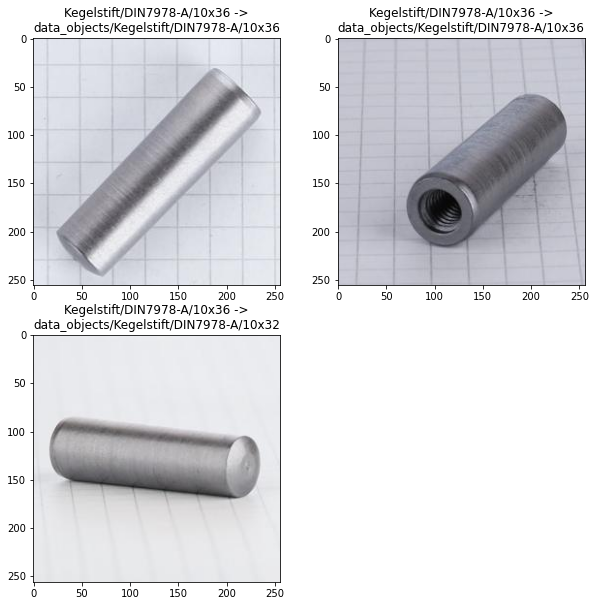

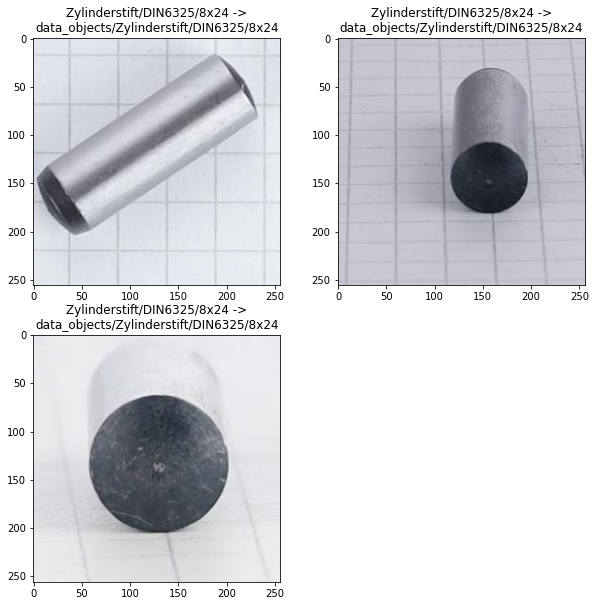

In [80]:
def evaluation(imagePath, model, classes, info, i):
    image = imread(imagePath)
    predicted_label = model.predict(np.array([image]))

    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.title(extract_class(imagePath) + ' ->\n' +classes[np.argmax(predicted_label[0])])

    print(info)
    print([extract_class(imagePath), classes[np.argmax(predicted_label[0])]])
    print('==============')


for obenFile, seiteFile, unterFile in zip(test_oben_examples, test_seite_examples, test_unter_examples):
    plt.figure(figsize=(10, 10))
    evaluation(obenFile, oben_model, oben_classes, 'oben', 0)
    evaluation(seiteFile, seite_model, seite_classes, 'seite', 1)
    evaluation(unterFile, unter_model, unter_classes, 'unter', 2)